# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Оценки параметров и сбор данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb и **в формате html**, который можно получить как `File -> Download as -> HTML`.
* Теоретические задачи необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив;
  * фотографией, **встроенной в ноутбук** посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Теоретические задачи не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта. Неправильно вставленные фотографии могут не передаться при отправке.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 5 баллов
* Задача 3 &mdash; 12 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 6 баллов
* Задача 5 &mdash; 10 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import requests
from time import sleep
import json

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**a).** $S^2 = \overline{X^2} - \overline{X}^2 = \overline{X^2} - 2\overline{X}^2 + \overline{X}^2 = \frac{1}{n}\sum\limits_{i = 1}^{n}X_{i}^2 - \frac{2}{n}\overline{X}\sum\limits_{i = 1}^{n}X_{i} + \frac{1}{n}\sum\limits_{i=1}^n \overline{X}^2 = \frac{1}{n}\sum\limits_{i = 1}^{n}\left(X_{i}^2 - 2\overline{X}X_{i} + \overline{X}^2\right) = \frac{1}{n}\sum\limits_{i = 1}^{n}\left(X_{i} - \overline{X}\right)^2$

**b).** 

$E_{\sigma}S^2 = E_{\sigma}\left(\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2\right) = E_{\sigma}\left(\frac1n\sum\limits_{i=1}^n\left((X_i - E_{\sigma}X_1) -(\overline{X}- E_{\sigma}X_1)\right)^2\right) = E_{\sigma}\left(\frac1n\sum\limits_{i=1}^n(X_i - E_{\sigma}X_1)^2 - \frac{2(\overline{X}- E_{\sigma}X_1)}{n}\sum\limits_{i=1}^n(X_i - E_{\sigma}X_1) + \frac1n(\overline{X}- E_{\sigma}X_1)^2\sum\limits_{i=1}^n1 \right) = E_{\sigma}\left(\frac1n\sum\limits_{i=1}^n(X_i - E_{\sigma}X_1)^2 - (\overline{X}- E_{\sigma}X_1)^2 \right) = E_{\sigma}\left(\frac1n\sum\limits_{i=1}^n(X_i - E_{\sigma}X_1)^2\right) - \frac1n \sigma^2 = \frac1n\sum\limits_{i=1}^n(E_{\sigma}X_{i}^2 - (E_{\sigma}X_1)^2)- \frac1n \sigma^2 = \sigma^2 - \frac1n \sigma^2 = \frac{n-1}{n}\sigma^2$

Получили, что:$$E_{\sigma}S^2 \neq \sigma^2$$
Следовательно оценка смещенная.

**P.S.** В пункте **b)** мы использовали следующее понятное равенство:$$EX_1 = EX_2 = \dots = EX_n = E\overline{X}$$

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** 

Как мы видим из задачи 1 в случае $S^2,$ мы получим смещенную оценку. Для $\frac{n}{n-1}S^2$ опять же из доказательства пункта **b)** в задаче 1 и линейности математического ожидания, получим, что оценка является несмещенной.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка может быть снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

Изначально я думал написать весь код в одной ячейке и запихнуть все в отрисовку графика, но получился очень смешанный, непонятный и копипастный код для каждого $n,$ поэтому я решил запихать все в функции распарсив логически действия на функции. По мне так получился более понятный и гибкий код. Также $y = 0$ я использовал для оценки $S^2,$ а $y = 1$ для $\frac{n}{n-1}S^2$

In [2]:
def draw(estim_S2, estim_n_S2, 
         n, k = 500, 
         color_S2 = 'red', color_n_S2 = 'blue',
         label_S2 = '', label_n_S2 = '',
         y_min = -0.25, y_max = 1.25, 
         width = 15, length = 3,
         scale = 1):
    """ Функция предназначена для отрисовки графиков для двух оценок
    
    estim_S2: Оценка S^2 для выборок
    estim_n_S2: Оценка \frac{n}{n-1}S^2 для выборок
    n: размер выборок
    k: количество выборок
    color_S2: цвет точек для S^2
    color_n_S2: цвет точек для \frac{n}{n-1}S^2
    label_S2: подпись для точек S^2
    label_n_S2: подпись для точек \frac{n}{n-1}S^2
    y_min: минимальное значение вертикальной линии соответствующей квадрату среднего отклонения
    y_max: максимальное значение вертикальной линии соответствующей квадрату среднего отклонения
    width: ширина графика
    length: длина графика
    scale: средне квадратичное отклонение
    """
    # Вначале:
    plt.figure(figsize=(width, length))

    # Для каждой оценки:
    plt.scatter(estim_S2, np.zeros(k), 
                alpha=0.1, s=100, color=color_S2, label=label_S2)
    plt.scatter(estim_S2.mean(), 0, marker='*', s=200, 
                color='w', edgecolors='black')
    
    plt.scatter(estim_n_S2, np.zeros(k) + 1, 
                alpha=0.1, s=100, color=color_n_S2, label=label_n_S2)
    plt.scatter(estim_n_S2.mean(), 1, marker='*', s=200, 
                color='w', edgecolors='black')

    # Для всего графика:
    plt.vlines(scale**2, y_min, y_max, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()

**Решение:**

In [3]:
def sum(elements):
    """Функция считает:
    \sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2
    
    numpy.array -> int"""
    return np.sum((elements - elements.mean())**2)

def S2(elements):
    """Функция считает:
    S^2 по данной выборке
    
    numpy.array -> int"""
    return sum(elements)/len(elements)
    
def n_S2(elements):
    """Функция считает:
    \frac{n}{n-1}S^2 по данной выборке
    
    numpy.array -> int"""
    return sum(elements)/(len(elements) - 1)

In [4]:
def estimate(arr):
    """Функция принимает:    
    arr: матрица выборок
    
    Возвращает:
    estim_S2: Оценка S^2 для выборок
    estim_n_S2: Оценка \frac{n}{n-1}S^2 для выборок"""
    
    estim_S2 = np.apply_along_axis(S2, 1, arr)
    estim_n_S2 = np.apply_along_axis(n_S2, 1, arr)
    return estim_S2, estim_n_S2

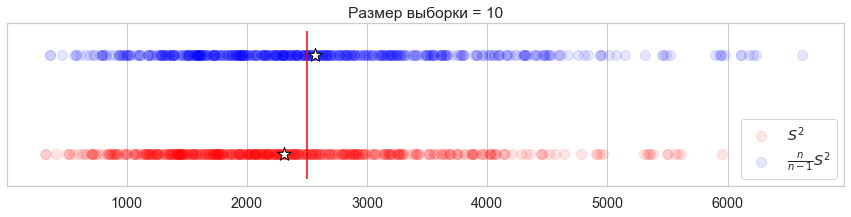

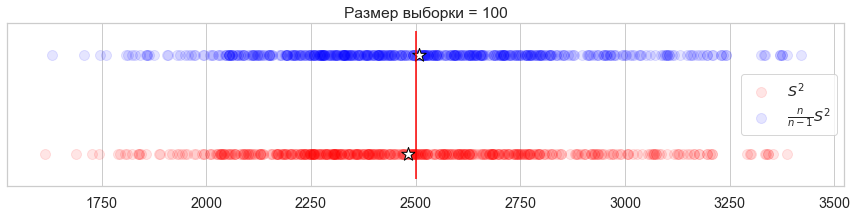

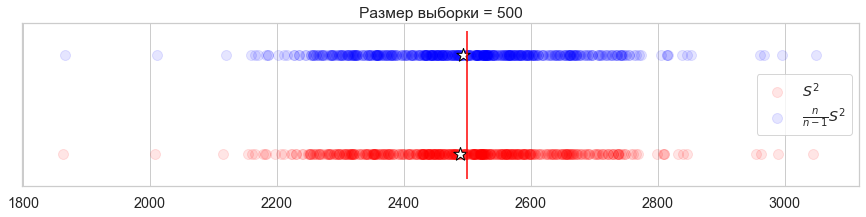

In [6]:
n = (10, 100, 500) 
k = 500
loc = 0
scale = 50

for i in n:
    arr = sps.norm.rvs(size = (k, i), loc = loc, scale = scale)
    draw(*estimate(arr), 
         i, 
         label_S2 = '$S^2$', 
         label_n_S2 = r'$\frac{n}{n-1} S^2$', 
         scale = scale)


**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

Смещенная оценка оказалось настолько смещенной, что я решил ограничить масштаб графика с помощью ylim, чтобы лучше увидеть поведение радом с горизонтальной линией $=scale^2,$ но даже без этого можно сделать основные выводы, которые приведены ниже.

In [7]:
def many_S2(arr):
    """Функция принимает:    
    arr: матрица выборок
    
    Возвращает:
    mean_squar - squar_mean: матрица S^2(n)
    """
    
    mean_squar = arr*arr
    mean_squar = mean_squar.cumsum(axis = 1)/(np.arange(arr.shape[1])+1)

    squar_mean = arr.cumsum(axis = 1)/(np.arange(arr.shape[1]) + 1)
    squar_mean = squar_mean**2
    
    return mean_squar - squar_mean

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


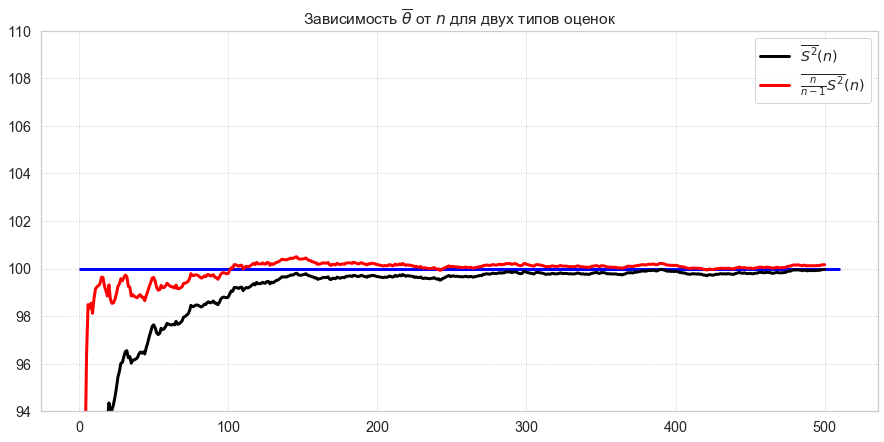

In [8]:
n = 500
k = 500
scale = 10
loc = 0

arr = sps.norm.rvs(size = (k, n), loc = loc, scale = scale)
s2 = many_S2(arr)
n_s2 = (np.arange(arr.shape[1]) + 1)*s2/np.arange(arr.shape[1])

plt.figure(figsize=(15, 7))

plt.plot(np.arange(n) + 1,
         s2.mean(axis = 0), 
         color = 'black',
         lw = 3,
         label = '$\overline{S^2}(n)$')

plt.plot(np.arange(n) + 1,
         n_s2.mean(axis = 0),
         color = 'red',
         lw = 3,
         label = r'$\overline{\frac{n}{n-1}S^2}(n)$')
 
     
plt.legend()
plt.grid(ls=':')
plt.ylim(0.94*scale**2, 1.1*scale**2)
plt.title(r'Зависимость $\overline{\theta}$ от $n$ для двух типов оценок')
plt.hlines(scale**2, -0.25, n + 10,color = 'blue', lw = 3)
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

Как я понимаю несмещенность --- это свойтсво которое оправдывает свое название. Эта оценка наименее отличается от теоретеческого значения, даже при малых значениях $n.$ Как мы видим из графика при $n \rightarrow \infty$ и смещенная оченка тоже стремится к теоретическому значению, но при малых $n$ все же следует выбирать несмещенную оценку. Это и оправдывает почему на физике мыберем несмещенную оценку, так как, там не так уж много данных.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

 ---
### Задача 3.   

В этой задаче вам нужно будет проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a>. Для сбора данных рекомендуется использовать <a target="_blank" href="https://dev.hh.ru/">официальное API</a>.

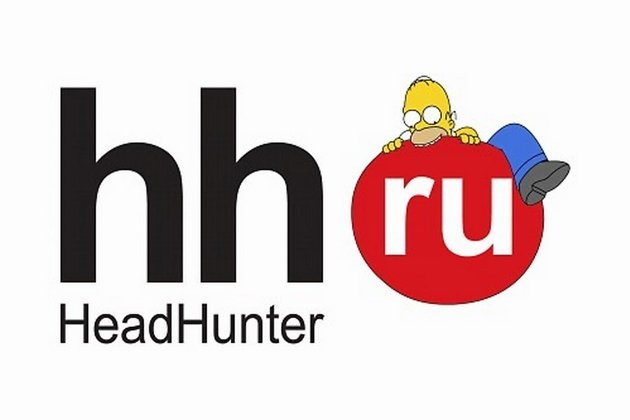

**1. Сбор данных**

Соберите данные о вакансии Data Scientist по Москве в одну таблицу и подготовьте их для анализа. Часто в индустрии подготовленные для анализа таблицы называют *витринами*. В ней должны быть:
- название вакансии,
- работодатель,
- зарплатная вилка,
- станция метро,
- ссылка на вакансию,
- опыт,
- требуемые навыки,
- что-то еще по вашему желанию.

Креативность приветствуется. При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. 

**При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер HeadHunter.**

Пример запроса к API:

In [5]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Повар",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Посмотрев изначальные данные, я понял, что этой информации недостаточно, не было к примеру поля `experience`, поэтому пришлось сделать новые запросы для каждой вакансии, чтобы подробнее узнать о них, с помощью `.../vacancies/{vacance_id}`.  Также, мне показалось, что интересно будет добавить в витрину график работы и имеется ли проверочный тест для определенной вакансии. По поводу код стайла, то получилось довольно некрасиво, потому что пришлось все неприятные столбцы обрабатывать ручками, хотел написать функцию для обработки, но там возникли проблемы, которые не получилось решить и, в итоге, вышло даже хуже. Также я удалил дубликаты вакансий и отфиксировал всем зарплаты в рубли с помощью функции `salary`, так как там всего три типа валют, я проверил это с помощью `unique`, также учел налоги(в интернете написано 13%). Также с помощью `get_lat` и `get_lng`получил георграфические координаты, которые понадобятся дальше по коду.

In [75]:
URL = 'https://api.hh.ru/vacancies'
num_of_pages = 5
pages = np.arange(num_of_pages)
area = 1 #Moscow
per_page = 100
vacance_id = pd.DataFrame()

for page in pages:
    params = {
        'text': "Data Scientist",
        'area': area,
        'page': page,
        'per_page': per_page
    }

    data = pd.DataFrame(json.loads(requests.get(URL, params).content.decode())['items'])
    vacance_id = vacance_id.append(data, ignore_index=True)
    
vacance_id.drop_duplicates(subset=['id'])
vacance_id = vacance_id['id']

In [76]:
currency = {'RUR' : 1, 'USD': 74.87, 'EUR': 90.57}
tax = 0.13

def salary_to(value):
    if value == None:
        return None
    
    if value['to'] == None:
        value['to'] = value['from']
    
    temp = value['to']
    temp *= currency[value['currency']]
    
    if not value['gross']:
        temp *= (tax + 1)
        
    return temp

def salary_from(value):
    if value == None or value['from'] == None:
        return None
    
    if value['from'] == None:
        value['from'] = value['to']
    
    temp = value['from']
    temp *= currency[value['currency']]
    
    if not value['gross']:
        temp *= (tax + 1)
        
    return temp

In [77]:
def get_lat(value):
    if value == None:
        return None
    
    if value.get('metro') != None:
        return value['metro']['lat']
    return None

def get_lng(value):
    if value == None:
        return None
    
    if value.get('metro') != None:
        return value['metro']['lng']
    return None

In [78]:
final_data = pd.DataFrame()
attributes = ['name',
              'employer', # name
              'salary', # from, to 
              'address', # metro.station_name
              'alternate_url',
              'experience', # name
              'key_skills', # arr[name]
              'schedule', # name
              'has_test',
              'test']  # required
currency = {'RUR' : 1, 'USD': 74.87, 'EUR': 90.57}

for v_id in vacance_id:
    URL = 'https://api.hh.ru/vacancies/{}'.format(v_id)
    data = pd.DataFrame(pd.Series(json.loads(requests.get(URL, params = {}).content.decode()))).T
    final_data = final_data.append(data, ignore_index=True)
    
final_data = final_data[attributes]

final_data['employer'] = final_data['employer'].apply(lambda x: None if x is None else x['name'])

final_data['salary_from'] = final_data['salary'].apply(salary_from)
final_data['salary_to'] = final_data['salary'].apply(salary_to)
final_data.drop('salary', axis = 1, inplace = True)

final_data['lat'] = final_data['address'].apply(get_lat)
final_data['lng'] = final_data['address'].apply(get_lng)
final_data['address'] = final_data['address'].apply(lambda x: None if x is None else x['metro'])
final_data['address'] = final_data['address'].apply(lambda x: None if x is None else x['station_name'])
final_data.rename(columns = {'address' : 'metro_station'}, inplace = True)

final_data['experience'] = final_data['experience'].apply(lambda x: None if x is None else x['name'])

final_data['schedule'] = final_data['schedule'].apply(lambda x: None if x is None else x['name'])

final_data['key_skills'] = final_data['key_skills'].apply(lambda x: list(i['name'] for i in x))

final_data['test'] = final_data['test'].apply(lambda x: None if x is None else x['required'])

**2. Анализ и визуализация данных**

Проведите исследование получившихся данных. Прежде всего убедитесь, что ваши данные чистые. Убедитесь, что вы проделали следующее:
- удаление дубликатов,
- предобработка пропусков,
- предобработка текстовых данных.

Среди вакансий можно выделять группы. *Например*, бизнес-аналитик, BI аналитик, продуктовый аналитик.

Ответьте не следующие вопросы:  
- Сколько сейчас доступно вакансий по вашему запросу?
- Выделяются ли среди вакансий какие-то группы? 
- Какие группы вакансий самые популярные?
- Какова средняя и медианная заработная плата?
- Какие ключевые навыки требуются для данной вакансии?
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию &mdash; для этого используйте библиотеку plotly. Постройте следующие графики:
- гистограмма распределения заработной платы;
- heatmap, отображающий зависимость количества вакансий от группы и навыка;
- зависимость средней заработной платы от требуемых навыков;
- распределение средней заработной платы по карте Москвы;
- распределение спроса на вакансию по карте Москвы.

Для построения последних двух графиков вам могут понадобиться <a target="_blank" href="http://www.lovrikinfo.ru/metrogps.php">внешние данные</a>.


In [79]:
# Сколько сейчас доступно вакансий по вашему запросу?
len(final_data)

328

Из всех групп, что я нашел, выделил в dict `groups`. Я разделяю группы по нахождению ключевого слова в `name`, кажется, что это очень грубая оценка, но лчше придумать не смог.

In [80]:
# Выделяются ли среди вакансий какие-то группы?
groups = {('engineer', 'инженер'):'Инженер', 
          ('market', 'маркет'):'Маркетолог аналитик', 
          ('product',) :'Продуктовый аналитик', 
          ('developer', 'разработчик'):'Разработчик'}

def parse_groups(value):
    if value == None:
        return None

    temp = value
    temp = temp.lower()

    for i, j in groups.items():
        for k in i:
            if temp.count(k) > 0:
                return j
    return None

final_data['groups'] = final_data['name'].apply(parse_groups)

In [81]:
# Какие группы вакансий самые популярные?
statistic_group = final_data[['name', 'groups']].groupby('groups').count()
statistic_group.rename(columns={'name':'counts'}, inplace = True)
statistic_group.sort_values(by='counts', ascending=False)

,counts
groups,
Инженер,49
Разработчик,20
Маркетолог аналитик,9
Продуктовый аналитик,7


In [82]:
# Какова средняя и медианная заработная плата?
print('Средняя зарплата: {} рублей'.format(int(((final_data['salary_from'] + final_data['salary_to'])/2).mean())))
print('Медианная зарплата: {} рублей'.format(int(((final_data['salary_from'] + final_data['salary_to'])/2).median())))

Средняя зарплата: 221866 рублей
Медианная зарплата: 201700 рублей


Если я правильно понял задание, то нам нужно вывести все какие-либо нужные навыки для Data Sceintist. Я сделал это с помощью data frame, причем количество наиболее часто встречающих навыков в вакансиях увеличивается слева направо. Также видно, что я выбрал довольно плохой способ набора навыков, ведь к примеру навыки `Математическая статистика` и `Mathematical Statistics` --- это по сути один и тот же навык, но в данном случае считается как разные навыки, потому что в данном случае код не умеет различать слова и предложения разных языков.

In [83]:
# Какие ключевые навыки требуются для данной вакансии?
key_skills = dict()

for i in final_data['key_skills']:
    for j in i:
        if key_skills.get(j) != None:
            key_skills[j] += 1
        else:
            key_skills.update({j : 1})
            
key_skills = {k: v for k, v in sorted(key_skills.items(), key=lambda item: item[1])}
pd.DataFrame(key_skills, index = [0])

,"ML-фреймворков (TensorFlow, PyTorch, NumPy);",Гарант плюс,Бизнес-консультирование,машинное обучение,компьютерное зрение,программирование,Mathematical Statistics,Mathematical Programming,Mathematical Modeling,количественные исследования,...,C++,Анализ данных,Spark,Математическая статистика,Linux,Git,Английский язык,Data Mining,SQL,Python
0,1,1,1,1,1,1,1,1,1,1,...,24,24,26,30,32,33,36,57,119,186


In [84]:
# Какой опыт требуется для данной вакансии?
experience_data = final_data[['name', 'experience']].groupby('experience').count()
experience_data.rename(columns = {'name':'counts'}, inplace = True)
experience_data

,counts
experience,
Более 6 лет,13
Нет опыта,33
От 1 года до 3 лет,144
От 3 до 6 лет,138


По таблице видно, что хорошо бы иметь хоть какой-то опыт, но не настолько все жестко, чтобы работать 6 лет и только потом тебя возьмут

In [85]:
# Какие работодатели в топе?
employer_data = final_data[['name', 'employer']].groupby('employer').count()
employer_data.rename(columns = {'name':'counts'}, inplace = True)
employer_data.sort_values(by = 'counts', ascending=False).head()

,counts
employer,
Сбербанк,51
Ozon,8
РАБЛЗ,8
МегаФон,6
Банк ВТБ (ПАО),5


Ну шо сказать, сбер --- это, конечно, не круто, но все же респект.

In [86]:
# В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?
area_data = final_data[['name', 'metro_station']].groupby('metro_station').count()
area_data.rename(columns = {'name':'counts'}, inplace = True)
area_data.sort_values(by = 'counts', ascending=False, inplace = True)
area_data.head()

,counts
metro_station,
Кутузовская,13
Маяковская,11
Деловой центр,7
Аэропорт,6
Технопарк,5


In [87]:
area_data.tail()

,counts
metro_station,
Марьина Роща,1
Молодежная,1
Московские ворота,1
Мякинино,1
Юго-Западная,1


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

No handles with labels found to put in legend.


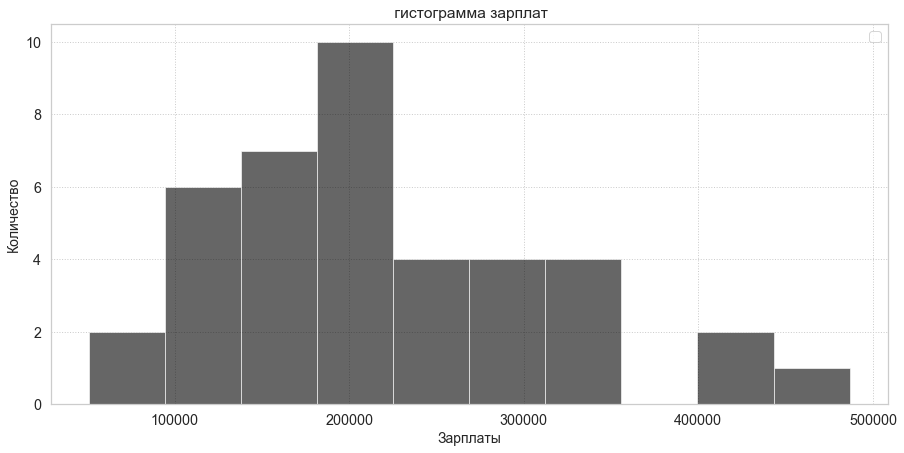

In [88]:
# гистограмма распределения заработной платы;
plt.figure(figsize = (15, 7))

plt.hist(
    (final_data['salary_from'] + final_data['salary_to'])/2, 
    bins = 10, 
    alpha = 0.6, 
    color = 'black'
)

plt.xlabel('Зарплаты', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title(' гистограмма зарплат')
plt.legend()
plt.grid(ls=':')
plt.show()

Впринципе диаграмма подтверждает то, что мы и видели со средними. В среднем зарплата у Data Scientist около 200к, но есть и "выбросы" (умные люди), которые зарабатывают больше 400к.

Опасно, далее идет говнокод! Я не придумал, как сделать лучше. Из датафрейма по навыкам, я выбрал самые востребованные навыки. Анализировать все --- это какая-то дичь, потому что их слишком много и не несут дополнительной информации, отчасти из-за проблемы с языками.

In [89]:
# heatmap, отображающий зависимость количества вакансий от группы и навыка;
skills = ['Python',
          'SQL',
          'Data Mining',
          'Английский язык',
          'Git',
          'Linux',
          'Spark',
          'Анализ данных',
          'C++']

def help_fun_python(value):
    for i in value:
        if i == 'Python':
            return 1
    return 0

def help_fun_sql(value):
    for i in value:
        if i == 'SQL':
            return 1
    return 0

def help_fun_dm(value):
    for i in value:
        if i == 'Data Mining':
            return 1
    return 0

def help_fun_english(value):
    for i in value:
        if i == 'Английский язык':
            return 1
    return 0

def help_fun_git(value):
    for i in value:
        if i == 'Git':
            return 1
    return 0

def help_fun_linux(value):
    for i in value:
        if i == 'Linux':
            return 1
    return 0

def help_fun_spark(value):
    for i in value:
        if i == 'Spark':
            return 1
    return 0

def help_fun_ad(value):
    for i in value:
        if i == 'Анализ данных':
            return 1
    return 0

def help_fun_c(value):
    for i in value:
        if i == 'C++':
            return 1
    return 0
          
final_data['Python'] = final_data['key_skills'].apply(help_fun_python)
final_data['SQL'] = final_data['key_skills'].apply(help_fun_sql)
final_data['Data Mining'] = final_data['key_skills'].apply(help_fun_dm)
final_data['Английский язык'] = final_data['key_skills'].apply(help_fun_english)
final_data['Git'] = final_data['key_skills'].apply(help_fun_git)
final_data['Linux'] = final_data['key_skills'].apply(help_fun_linux)
final_data['Spark'] = final_data['key_skills'].apply(help_fun_spark)
final_data['Анализ данных'] = final_data['key_skills'].apply(help_fun_ad)
final_data['C++'] = final_data['key_skills'].apply(help_fun_c)


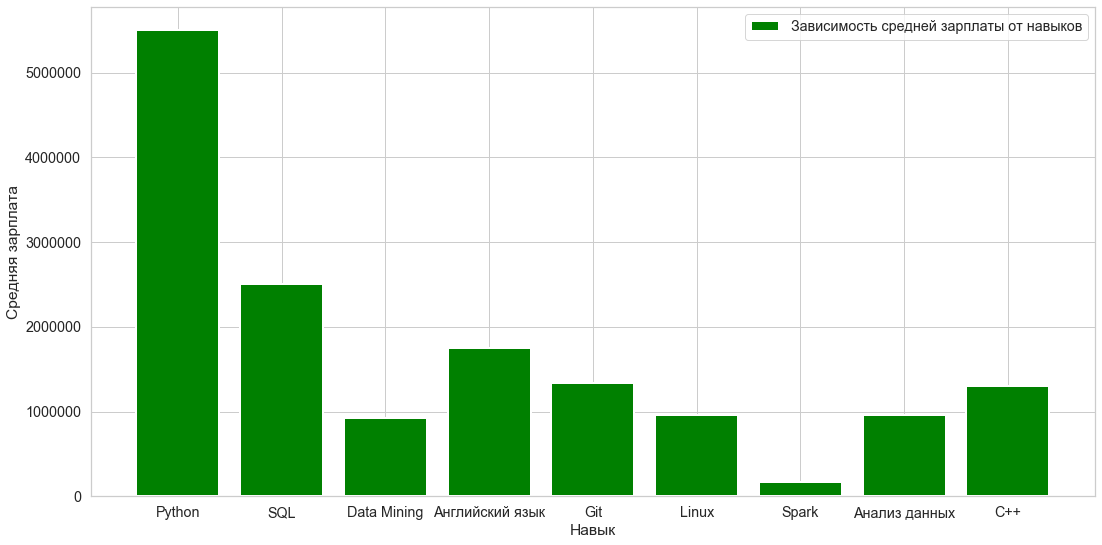

In [90]:
# зависимость средней заработной платы от требуемых навыков;
final_data['salary_mean'] = (final_data['salary_from'] + final_data['salary_to'])/2
graph = []

for i in skills:
    graph.append(final_data[['salary_mean', i]].groupby(i).sum().iloc[1,0])
    
plt.figure(figsize=(18, 9))

plt.bar(
    range(len(graph)),
    graph,
    color = 'green', 
    lw = 2
)

plt.xticks(range(len(graph)), skills)

plt.ylabel('Средняя зарплата')
plt.xlabel('Навык')
plt.legend(['Зависимость средней зарплаты от навыков'])
plt.show()

Как мы видим `python` и `sql` --- это одни из самых важных навыков для Data Scientist

In [91]:
# распределение средней заработной платы по карте Москвы;
import plotly.graph_objects as go

# центровка
map_center = dict(lat=final_data.lat[3], lon=final_data.lng[3])

fig = go.Figure(go.Scattermapbox(lat=final_data.lat, 
                                 lon=final_data.lng, 
                                 text=final_data.name,
                                 marker=dict(colorbar=dict(title="Зарплаты"),
                                             color=final_data.salary_mean)))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom = 9))
fig.show()

Даже не знаю, что еще добавить, карты получились очень информативными с градиентной раскраской в зависимости от средней зарпалаты в компании.

In [92]:
# распределение спроса на вакансию по карте Москвы.
coun_vac = final_data[['name', 'lat','lng']].groupby(['lat', 'lng']).count()
coun_vac.reset_index(inplace=True)
coun_vac.rename(columns = {'name' :'count_v'}, inplace = True)

map_center = dict(lat=coun_vac.lat[1], lon=coun_vac.lng[1])

fig = go.Figure(go.Scattermapbox(lat=coun_vac.lat, 
                                 lon=coun_vac.lng, 
                                 marker=dict(colorbar=dict(title="Количество вакансий"),
                                             color=coun_vac.count_v)))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom = 9))
fig.show()

Здесь тоже вроде все понятно

Какие выводы можно сделать из построенных графиков?
Я понял для себя 2 сокровенные истины:

1) Надо идти в Data Scientist и майнить 300к в наносекунду.

2) Вакансии разбросаны по всей Москве, и везде разные цены. Я не нашел никакой корреляции именно с картой. Единственное, что наибольшую зарплату давали за Researcher, что лочгино, это как бы наука и люди много лет учатся и хотят, чтобы им подабающе платили. А наибольшее число вакансии --- это старший аналитик и аналитик по построению кредитного риска.


**3. Анализ профессии, о которой вы мечтали в детстве**

Проведите аналогичное исследование для профессии, о которой вы мечтали в детстве. Это может быть повар, учитель, пожарный и т.д. &mdash; все зависит от вас ☺.

Я в детстве мечтал стать Data Scientist-ом☺.

In [24]:
URL = 'https://api.hh.ru/vacancies'
num_of_pages = 5
pages = np.arange(num_of_pages)
area = 1 #Moscow
per_page = 100
vacance_id = pd.DataFrame()

for page in pages:
    params = {
        'text': "Учитель математики",
        'area': area,
        'page': page,
        'per_page': per_page
    }

    data = pd.DataFrame(json.loads(requests.get(URL, params).content.decode())['items'])
    vacance_id = vacance_id.append(data, ignore_index=True)
    
vacance_id.drop_duplicates(subset=['id'])
vacance_id = vacance_id['id']

In [25]:
currency = {'RUR' : 1, 'USD': 74.87, 'EUR': 90.57}
tax = 0.13

def salary_to(value):
    if value == None:
        return None
    
    if value['to'] == None:
        value['to'] = value['from']
    
    temp = value['to']
    temp *= currency[value['currency']]
    
    if not value['gross']:
        temp *= (tax + 1)
        
    return temp

def salary_from(value):
    if value == None or value['from'] == None:
        return None
    
    if value['from'] == None:
        value['from'] = value['to']
    
    temp = value['from']
    temp *= currency[value['currency']]
    
    if not value['gross']:
        temp *= (tax + 1)
        
    return temp

In [26]:
def get_lat(value):
    if value == None:
        return None
    
    if value.get('metro') != None:
        return value['metro']['lat']
    return None

def get_lng(value):
    if value == None:
        return None
    
    if value.get('metro') != None:
        return value['metro']['lng']
    return None

In [27]:
final_data = pd.DataFrame()
attributes = ['name',
              'employer', # name
              'salary', # from, to 
              'address', # metro.station_name
              'alternate_url',
              'experience', # name
              'key_skills', # arr[name]
              'schedule', # name
              'has_test',
              'test']  # required
currency = {'RUR' : 1, 'USD': 74.87, 'EUR': 90.57}

for v_id in vacance_id:
    URL = 'https://api.hh.ru/vacancies/{}'.format(v_id)
    data = pd.DataFrame(pd.Series(json.loads(requests.get(URL, params = {}).content.decode()))).T
    final_data = final_data.append(data, ignore_index=True)
    
final_data = final_data[attributes]

final_data['employer'] = final_data['employer'].apply(lambda x: None if x is None else x['name'])

final_data['salary_from'] = final_data['salary'].apply(salary_from)
final_data['salary_to'] = final_data['salary'].apply(salary_to)
final_data.drop('salary', axis = 1, inplace = True)

final_data['lat'] = final_data['address'].apply(get_lat)
final_data['lng'] = final_data['address'].apply(get_lng)
final_data['address'] = final_data['address'].apply(lambda x: None if x is None else x['metro'])
final_data['address'] = final_data['address'].apply(lambda x: None if x is None else x['station_name'])
final_data.rename(columns = {'address' : 'metro_station'}, inplace = True)

final_data['experience'] = final_data['experience'].apply(lambda x: None if x is None else x['name'])

final_data['schedule'] = final_data['schedule'].apply(lambda x: None if x is None else x['name'])

final_data['key_skills'] = final_data['key_skills'].apply(lambda x: list(i['name'] for i in x))

final_data['test'] = final_data['test'].apply(lambda x: None if x is None else x['required'])

In [28]:
# Сколько сейчас доступно вакансий по вашему запросу?
len(final_data)

155

In [29]:
groups = {('assistant ', 'помощник'):'Помощник', 
          ('воспитатель', ):'Воспитатель ', 
          ('преподаватель','учитель') :'Преподаватель', 
          ('редактор', ):'Редактор'}

def parse_groups(value):
    if value == None:
        return None

    temp = value
    temp = temp.lower()

    for i, j in groups.items():
        for k in i:
            if temp.count(k) > 0:
                return j
    return None

final_data['groups'] = final_data['name'].apply(parse_groups)

In [30]:
# Какие группы вакансий самые популярные?
statistic_group = final_data[['name', 'groups']].groupby('groups').count()
statistic_group.rename(columns={'name':'counts'}, inplace = True)
statistic_group.sort_values(by='counts', ascending=False)

,counts
groups,
Преподаватель,82
Редактор,4
Воспитатель,3
Помощник,1


In [31]:
# Какова средняя и медианная заработная плата?
print('Средняя зарплата: {} рублей'.format(int(((final_data['salary_from'] + final_data['salary_to'])/2).mean())))
print('Медианная зарплата: {} рублей'.format(int(((final_data['salary_from'] + final_data['salary_to'])/2).median())))

Средняя зарплата: 74269 рублей
Медианная зарплата: 70000 рублей


In [32]:
# Какие ключевые навыки требуются для данной вакансии?
key_skills = dict()

for i in final_data['key_skills']:
    for j in i:
        if key_skills.get(j) != None:
            key_skills[j] += 1
        else:
            key_skills.update({j : 1})
            
key_skills = {k: v for k, v in sorted(key_skills.items(), key=lambda item: item[1])}
pd.DataFrame(key_skills, index = [0])

,математика,Управленческие навыки,Работа с детьми,Skype,Работа с большим объемом информации,Административная поддержка руководителя,Недирективные способы коммуникации с учениками,Методист,Диагностика,Умение работать в коллективе,...,SQL,Python,Работа в команде,Пользователь ПК,Грамотность,Организация учебного процесса,Обучение и развитие,Грамотная речь,Обучение,Преподаватель
0,1,1,1,1,1,1,1,1,1,1,...,13,13,17,20,22,30,36,36,40,43


In [33]:
# Какой опыт требуется для данной вакансии?
experience_data = final_data[['name', 'experience']].groupby('experience').count()
experience_data.rename(columns = {'name':'counts'})

,counts
experience,
Более 6 лет,12
Нет опыта,24
От 1 года до 3 лет,61
От 3 до 6 лет,58


In [34]:
# Какие работодатели в топе?
employer_data = final_data[['name', 'employer']].groupby('employer').count()
employer_data.rename(columns = {'name':'counts'}, inplace = True)
employer_data.sort_values(by = 'counts', ascending=False).head()

,counts
employer,
Центр онлайн-обучения Нетология-групп,10
Uchi.ru,9
Ozon,9
Алгоритмика,9
Skyeng,8


In [35]:
# В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?
area_data = final_data[['name', 'metro_station']].groupby('metro_station').count()
area_data.rename(columns = {'name':'counts'}, inplace = True)
area_data.sort_values(by = 'counts', ascending=False, inplace = True)
area_data.head()

,counts
metro_station,
Улица 1905 года,5
Деловой центр,4
Алексеевская,1
Октябрьское поле,1
Тульская,1


In [36]:
area_data.tail()

,counts
metro_station,
Бунинская аллея,1
Белорусская,1
Багратионовская,1
Аэропорт,1
Фрунзенская,1


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

No handles with labels found to put in legend.


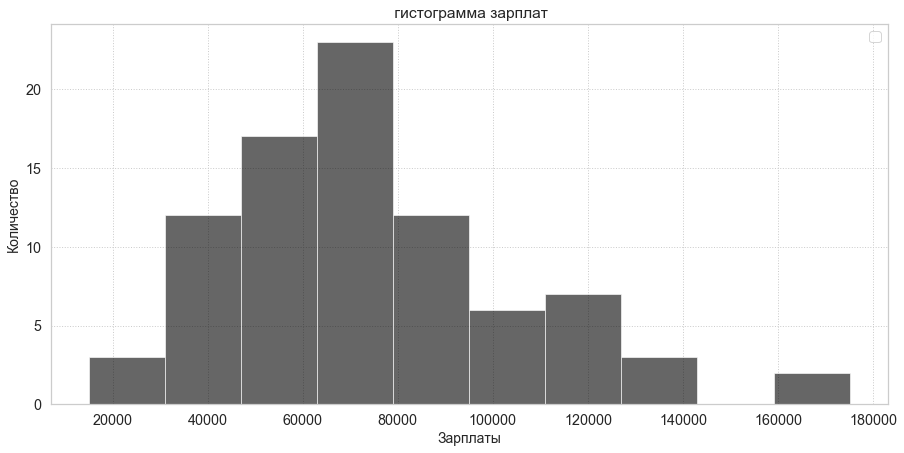

In [37]:
# гистограмма распределения заработной платы;
plt.figure(figsize = (15, 7))

plt.hist(
    (final_data['salary_from'] + final_data['salary_to'])/2, 
    bins = 10, 
    alpha = 0.6, 
    color = 'black'
)

plt.xlabel('Зарплаты', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title(' гистограмма зарплат')
plt.legend()
plt.grid(ls=':')
plt.show()

In [46]:
# heatmap, отображающий зависимость количества вакансий от группы и навыка;
skills = ['Преподаватель',
          'Обучение',
          'Грамотная речь',
          'Организация учебного процесса',
          'Пользователь ПК',
          'Работа в команде',
          'Python',
          'SQL']

def help_fun_teac(value):
    for i in value:
        if i == 'Преподаватель':
            return 1
    return 0

def help_fun_ob(value):
    for i in value:
        if i == 'Обучение':
            return 1
    return 0

def help_fun_sp(value):
    for i in value:
        if i == 'Грамотная речь':
            return 1
    return 0

def help_fun_st(value):
    for i in value:
        if i == 'Организация учебного процесса':
            return 1
    return 0

def help_fun_pc(value):
    for i in value:
        if i == 'Пользователь ПК':
            return 1
    return 0

def help_fun_team(value):
    for i in value:
        if i == 'Работа в команде':
            return 1
    return 0

def help_fun_python(value):
    for i in value:
        if i == 'Python':
            return 1
    return 0

def help_fun_sql(value):
    for i in value:
        if i == 'SQL':
            return 1
    return 0
          
final_data['Преподаватель'] = final_data['key_skills'].apply(help_fun_teac)
final_data['Обучение'] = final_data['key_skills'].apply(help_fun_ob)
final_data['Грамотная речь'] = final_data['key_skills'].apply(help_fun_sp)
final_data['Организация учебного процесса'] = final_data['key_skills'].apply(help_fun_st)
final_data['Пользователь ПК'] = final_data['key_skills'].apply(help_fun_pc)
final_data['Работа в команде'] = final_data['key_skills'].apply(help_fun_team)
final_data['Python'] = final_data['key_skills'].apply(help_fun_python)
final_data['SQL'] = final_data['key_skills'].apply(help_fun_sql)

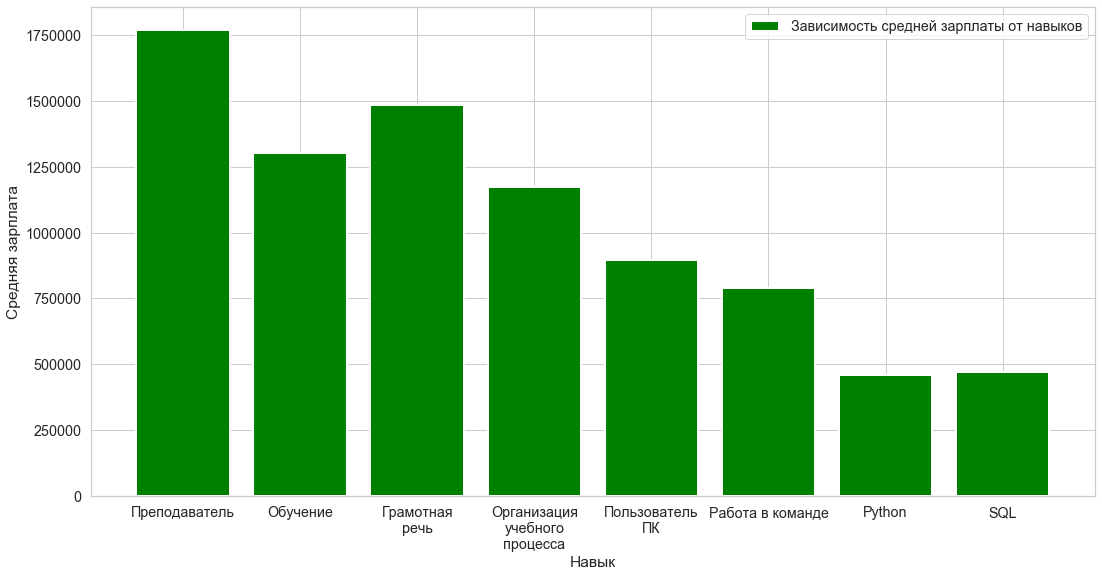

In [47]:
# зависимость средней заработной платы от требуемых навыков;
final_data['salary_mean'] = (final_data['salary_from'] + final_data['salary_to'])/2
graph = []

for i in skills:
    graph.append(final_data[['salary_mean', i]].groupby(i).sum().iloc[1,0])
    
plt.figure(figsize=(18, 9))

plt.bar(
    range(len(graph)),
    graph,
    color = 'green', 
    lw = 2
)

skills = ['Преподаватель',
          'Обучение',
          'Грамотная\nречь',
          'Организация\nучебного\nпроцесса',
          'Пользователь\nПК',
          'Работа в команде',
          'Python',
          'SQL']

plt.xticks(range(len(graph)), skills)

plt.ylabel('Средняя зарплата')
plt.xlabel('Навык')
plt.legend(['Зависимость средней зарплаты от навыков'])
plt.show()

In [54]:
# распределение средней заработной платы по карте Москвы;

# центровка
map_center = dict(lat=final_data.lat[0], lon=final_data.lng[0])

fig = go.Figure(go.Scattermapbox(lat=final_data.lat, 
                                 lon=final_data.lng, 
                                 text=final_data.name,
                                 marker=dict(colorbar=dict(title="Зарплаты"),
                                             color=final_data.salary_mean)))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom = 9))
fig.show()

In [55]:
# распределение спроса на вакансию по карте Москвы.
coun_vac = final_data[['name', 'lat','lng']].groupby(['lat', 'lng']).count()
coun_vac.reset_index(inplace=True)
coun_vac.rename(columns = {'name' :'count_v'}, inplace = True)

map_center = dict(lat=coun_vac.lat[1], lon=coun_vac.lng[1])

fig = go.Figure(go.Scattermapbox(lat=coun_vac.lat, 
                                 lon=coun_vac.lng, 
                                 marker=dict(colorbar=dict(title="Количество вакансий"),
                                             color=coun_vac.count_v)))
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom = 9))
fig.show()

Здесь выводы примерно такие же как и у Data Scientist, только с заменой на учителя. Единстевенное, что я бы подметил --- по сравнению с Data Scientis зарплаты учителей ниже. Просто так, к слову.

**Замечание в тему.** Многие из вас наверняка сейчас уже начинают задумываться о работе. Конечно, вы имеете на это полное право. Однако, по нашему опыту работа на 3 курсе отрицательно сказывается на степени усвоения материала. По сути все предметы цикла Data Science у вас еще впереди. Подумайте, наверное, лучше разобраться во всем во время учебы, чем потом что-то где-то нагонять. Более простой вариант &mdash; летняя стажировка, но не забудьте отдохнуть, набравшись сил перед непростым 3 курсом ☺.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 4.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Пусть $X_1, \dots, X_n$ --- независимо одинаково распределенные (в каждом пункте с соответствующем распределением) случайные величины. Подберем оценку параметра $\theta$ стандартным методом моментов.

* Так как $\theta \in \mathbb {R}^2$  Составим следующую систему уравнений:

\begin{equation*}
 \begin{cases}
   E_{\theta}X_1 = \overline{X},
   \\
   E_{\theta}X_{1}^2 = \overline{X^2}.
 \end{cases}
\end{equation*}

Зная, что $E_{\theta}X_1 = \frac{\widehat{a}+\widehat{b}}{2}$ и $E_{\theta}X_{1}^2 = \frac{\widehat{a^2}+\widehat{ab}+\widehat{b^2}}{3},$ то получим:
\begin{equation*}
 \begin{cases}
   \frac{\widehat{a}+\widehat{b}}{2} = \overline{X},
   \\
   \frac{\widehat{a^2}+\widehat{ab}+\widehat{b^2}}{3} = \overline{X^2}.
 \end{cases}
\end{equation*}

Решив эту систему относительно $\widehat{a}$ и $\widehat{b},$ получим:
\begin{equation*}
 \begin{cases}
   \widehat{a} = \overline{X} - \sqrt{3}S,
   \\
   \widehat{b} = \overline{X} + \sqrt{3}S.
 \end{cases}
\end{equation*}

* Так как $\theta \in \mathbb {R}^1$  Составим следующее уравнение:$$E_{\theta}X_1 = \overline{X}.$$

Зная, что $E_{\theta}X_1 = \widehat{\theta},$ то получим:$$\widehat{\theta} = \overline{X}.$$

* Так как $\theta \in \mathbb {R}^2$  Составим следующую систему уравнений:

\begin{equation*}
 \begin{cases}
   E_{\theta}X_1 = \overline{X},
   \\
   E_{\theta}X_{1}^2 = \overline{X^2}.
 \end{cases}
\end{equation*}

Зная, что $E_{\theta}X_1 = \widehat{a},$ то получим:$$\widehat{a} = \overline{X}.$$
Также зная $D_{\theta}X_1 = \widehat{\sigma^2}$ и $D_{\theta}X_1 = E_{\theta}X_{1}^2 - (E_{\theta}X_{1})^2,$ получим $$E_{\theta}X_{1}^2 = \widehat{a^2} + \widehat{\sigma^2} = (\overline{X})^2 + \widehat{\sigma^2} = \overline{X^2}.$$

В итоге получим, что:
\begin{equation*}
 \begin{cases}
   \widehat{a} = \overline{X},
   \\
   \widehat{\sigma} = S.
 \end{cases}
\end{equation*}

---
### Задача 5.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

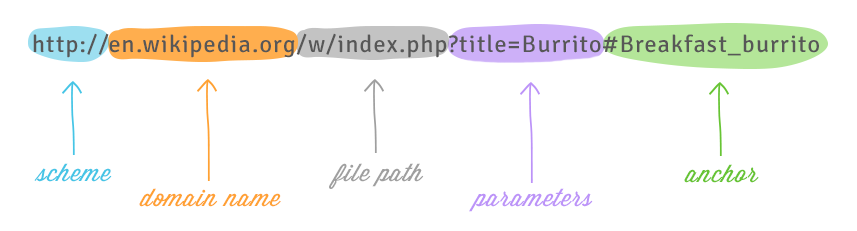

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [58]:
from url_normalize import url_normalize

In [59]:
...

Ellipsis

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a>. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [61]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [62]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [64]:
...

Cделайте таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** При помощи `plotly` визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. При наведении курсора на точку, обозначающую страницу, должна появляться подсказка с названием этой страницы.

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму и ядерную оценку плотности для времени скачивания страницы.

In [ ]:
...

Какими известными вам стандартными распределениями оно может быть приближено? Найдите оценку параметров этого распределения по методу моментов и отобразите на графике плотность с полученными значениями параметров.

*Замечание.* Результат сильно зависит от сайта, железа и прочих характеристик. По идее должно получится неплохое приближение чем-то из того, что вам известно. Но если ничего не получится, то просто оставьте и прокомментируйте ваши попытки разобраться.

In [ ]:
...

**Выводы:** <...>